#P2
##Due 02/17 @ 11:59 PM
##Gary Watson
##Alex Hromada
##Ethan Matzdorf


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import sys
import plotly.graph_objects as go
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

from gapstat import gapstat

#Part A

##Q1

##P2Delta
##Gary Watson
##Alex Hromada
##Ethan Matzdorf




##Q2

#Q2(a)

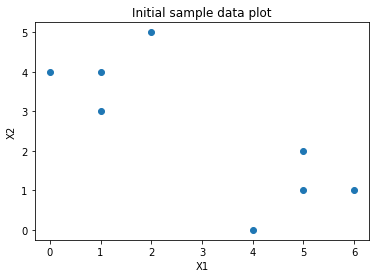

In [ ]:
x1 = [0,1,1,2,4,5,5,6]
x2 = [4,3,4,5,0,1,2,1]
plt.scatter(x1,x2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Initial sample data plot')
plt.savefig('Q2a')

#Q2(b)

In [ ]:
c1x = np.array([4,5,5,6])
c1y = np.array([0,1,2,1])

c2x = np.array([0,1,1,2])
c2y = np.array([4,3,4,5])

cent1 = np.array([np.average(c1x), np.average(c1y)])
cent2= np.array([np.average(c2x), np.average(c2y)])

print(f"C1 centroid: {np.average(c1x)}, {np.average(c1y)}")
print(f"C2 centroid: {np.average(c2x)}, {np.average(c2y)}")

C1 centroid: 5.0, 1.0
C2 centroid: 1.0, 4.0


#Q2(c)

In [ ]:
samples = np.array([[0,1,1,2,4,5,5,6], [4,3,4,5,0,1,2,1]])

n=1
for sample in samples.T:
  cdist1 = np.linalg.norm(cent1-sample)
  cdist2 = np.linalg.norm(cent2-sample)
  print(f"Sample {n}: {sample} c1 distance: {cdist1} c2 distance: {cdist2}")
  print(sample)
  if (cdist1 >= cdist2): 
    print('1') 
  else: print('2')
  n = n + 1

Sample 1: [0 4] c1 distance: 5.830951894845301 c2 distance: 1.0
[0 4]
1
Sample 2: [1 3] c1 distance: 4.47213595499958 c2 distance: 1.0
[1 3]
1
Sample 3: [1 4] c1 distance: 5.0 c2 distance: 0.0
[1 4]
1
Sample 4: [2 5] c1 distance: 5.0 c2 distance: 1.4142135623730951
[2 5]
1
Sample 5: [4 0] c1 distance: 1.4142135623730951 c2 distance: 5.0
[4 0]
2
Sample 6: [5 1] c1 distance: 0.0 c2 distance: 5.0
[5 1]
2
Sample 7: [5 2] c1 distance: 1.0 c2 distance: 4.47213595499958
[5 2]
2
Sample 8: [6 1] c1 distance: 1.0 c2 distance: 5.830951894845301
[6 1]
2


#Q2(e)

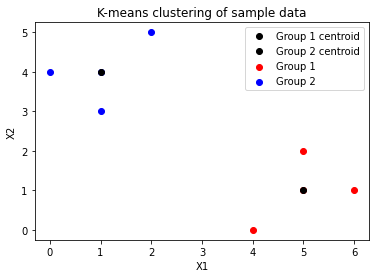

In [ ]:
plt.scatter(c1x,c1y,color='Red', label='Group 1')
plt.scatter(c2x,c2y,color='Blue', label='Group 2')
plt.plot(1,4,'ro',color='Black', label='Group 1 centroid')
plt.plot(5,1,'ro',color='Black', label='Group 2 centroid')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means clustering of sample data')
plt.legend()
plt.savefig('Q2e')

#Part B

#Q4

In [ ]:
values = np.array([(20, 0), (30, 0), (40, 0), (60, 0), (120, 0)])
scaler0_1 = MinMaxScaler()
scaler1_1 = MinMaxScaler(feature_range=(-1,1))
scaler_z = StandardScaler()

scaler0_1.fit(values)
values_scaled = scaler0_1.transform(values)

scaler1_1.fit(values)
values_scaled_ = scaler1_1.transform(values)

values_scaled_z = scaler_z.fit_transform(values)

print("Values normalized with min=0 and max=1: ")
np.savetxt(sys.stdout, values_scaled[0:5, 0], fmt="%.1f", newline='\t')
print()

print("Values normalized with min=-1 and max=1: ")
np.savetxt(sys.stdout, values_scaled_[0:5, 0], fmt="%.1f", newline='\t')
print()

print("Values z-normalized: ")
np.savetxt(sys.stdout, values_scaled_z[0:5, 0], fmt="%.4f", newline='\t')
print()

Values normalized with min=0 and max=1: 
0.0	0.1	0.2	0.4	1.0	
Values normalized with min=-1 and max=1: 
-1.0	-0.8	-0.6	-0.2	1.0	
Values z-normalized: 
-0.9563	-0.6751	-0.3938	0.1688	1.8564	


#Q5

#Q5(a)

In [ ]:
samples = np.array([(1.4, 1.3, 2.9), 
                    (1.8, 1.1, 3.2), 
                    (1.3, 1.2, 2.9), 
                    (0.9, 3.3, 3.1), 
                    (1.5, 2.1, 3.3)])

x_6 = np.array([1.25, 1.74, 3.01])

dist_man = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
dist_std = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
dist_mink = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
dist_sup = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
dist_cos = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

for i in range(5):
  dist_man[i] = distance.cityblock(samples[i], x_6)


print("The Manhattan distance between each point of the data set and the new point x6: ")
np.savetxt(sys.stdout, dist_man, fmt="%.2f", newline='\t')
print()

for i in range(5):
  dist_std[i] = distance.euclidean(samples[i], x_6)

print("The Euclidean distance between each point of the data set and the new point x6: ")
np.savetxt(sys.stdout, dist_std, fmt="%.4f", newline='\t')
print()

for i in range(5):
  dist_mink[i] = distance.minkowski(samples[i], x_6, p=3)

print("The Minkowski distance with lambda=3 between each point of the data set and the new point x6: ")
np.savetxt(sys.stdout, dist_mink, fmt="%.4f", newline='\t')
print()

for i in range(5):
  dist_sup[i] = distance.chebyshev(samples[i], x_6)

print("The Supremum distance between each point of the data set and the new point x6: ")
np.savetxt(sys.stdout, dist_sup, fmt="%.2f", newline='\t')
print()

for i in range(5):
  dist_cos[i] = distance.cosine(samples[i], x_6)

print("The Cosine similarity between each point of the data set and the new point x6: ")
np.savetxt(sys.stdout, dist_cos, fmt="%.6f", newline='   ')
print()

  





The Manhattan distance between each point of the data set and the new point x6: 
0.70	1.38	0.70	2.00	0.90	
The Euclidean distance between each point of the data set and the new point x6: 
0.4777	0.8650	0.5534	1.6013	0.5255	
The Minkowski distance with lambda=3 between each point of the data set and the new point x6: 
0.4480	0.7579	0.5417	1.5659	0.4425	
The Supremum distance between each point of the data set and the new point x6: 
0.44	0.64	0.54	1.56	0.36	
The Cosine similarity between each point of the data set and the new point x6: 
0.006975   0.025745   0.008671   0.050270   0.001018   


#Q5(b)

In [ ]:
samples = np.array([(1.4, 1.3, 2.9), 
                    (1.8, 1.1, 3.2), 
                    (1.3, 1.2, 2.9), 
                    (0.9, 3.3, 3.1), 
                    (1.5, 2.1, 3.3),
                    (1.25, 1.74, 3.01)])

dist_std = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

scaler = MinMaxScaler()

scaler.fit(samples)
samples_scaled = scaler.transform(samples)

x_6 = samples_scaled[5]

for i in range(5):
  dist_std[i] = distance.euclidean(samples_scaled[i], x_6)

print("The Euclidean distance between each point of the data set and the new point x6 after min-max normalization: ")
np.savetxt(sys.stdout, dist_cos, fmt="%.6f", newline='   ')
print()


The Euclidean distance between each point of the data set and the new point x6 after min-max normalization: 
0.006975   0.025745   0.008671   0.050270   0.001018   


#Q6

#Q6(a)

Text(0.5, 1.0, 'Data subset of interest for clustering')

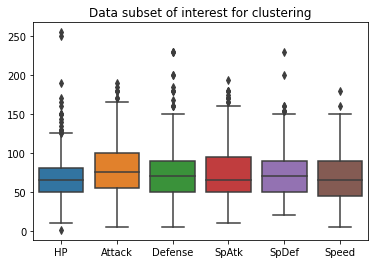

In [ ]:
pokemon_data = pd.read_csv('Pokemon.csv')
pokemon_cluster_data = pokemon_data[['HP','Attack','Defense','SpAtk','SpDef','Speed']]
boxplot = sb.boxplot(data=pokemon_cluster_data)
plt.title('Data subset of interest for clustering')

#Q6(b)

In [ ]:
scaler = MinMaxScaler()
normalized_pokemon_cluster_data = pd.DataFrame(scaler.fit_transform(pokemon_cluster_data))
normalized_pokemon_cluster_data.columns = ['HP','Attack','Defense','SpAtk','SpDef','Speed']

#Q6(c)

In [ ]:
for k in range(2,8):
  kmeans = KMeans(n_clusters=k, random_state=0).fit(normalized_pokemon_cluster_data)
  if(k == 5):
    centroids = kmeans.cluster_centers_

#Q6(d)

In [ ]:
print(f"Estimated optimal K = {gapstat(X=normalized_pokemon_cluster_data, max_k=8,calcStats=False)[0]}")

Estimated optimal K = 5


#Q6(e)

In [ ]:
row_labels = ['HP','Attack','Defense','SpAtk','SpDef','Speed']
column_labels = ['Group 1','Group 2','Group 3','Group 4','Group 5']
#print(centroids)
kmeans_result = pd.DataFrame(centroids.T,index=row_labels,columns=column_labels)
print('With K=5 groups:')
print(kmeans_result)

With K=5 groups:
          Group 1   Group 2   Group 3   Group 4   Group 5
HP       0.311234  0.271102  0.201631  0.344903  0.302205
Attack   0.566536  0.399135  0.261892  0.615884  0.339027
Defense  0.427651  0.254785  0.209032  0.379103  0.390293
SpAtk    0.268711  0.386377  0.201262  0.612319  0.430522
SpDef    0.253326  0.242254  0.140085  0.361404  0.382210
Speed    0.326848  0.520305  0.251286  0.545965  0.286446


#Q6(f)

In [ ]:
#Get optimal K according to gap statistic
nonnormalized_optimal_k = gapstat(X=pokemon_cluster_data, max_k=8,calcStats=False)[0]
#Run K-means with optimal K
nonnormalized_kmeans = KMeans(n_clusters=nonnormalized_optimal_k, random_state=0).fit(pokemon_cluster_data)
#Retrieve centroids of data clustered with optimal K
nonnormalized_kmeans_centroids = nonnormalized_kmeans.cluster_centers_
#Report final centroids
groups = []
for x in range(0,nonnormalized_optimal_k) : groups.append(f"Group {x+1}")

nonnormalized_kmeans_result = pd.DataFrame(nonnormalized_kmeans_centroids.T,index=row_labels,columns=groups)
print(f"With K={nonnormalized_optimal_k} groups:")
print(nonnormalized_kmeans_result)

With K=5 groups:
           Group 1    Group 2    Group 3     Group 4     Group 5
HP       83.154321  49.887681  74.656627   89.509259   69.397727
Attack   67.759259  53.753623  95.951807  120.925926   95.454545
Defense  74.858025  51.550725  68.686747   92.879630  128.250000
SpAtk    92.648148  47.322464  69.373494  123.111111   61.068182
SpDef    89.950617  48.858696  68.325301   97.861111   85.840909
Speed    67.345679  49.605072  89.548193  100.287037   49.147727


#Q6(g)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=kmeans_result['Group 1'],
    theta=row_labels,
    fill='toself',
    name='Group 1'
))

fig.add_trace(go.Scatterpolar(
    r=kmeans_result['Group 2'],
    theta=row_labels,
    fill='toself',
    name='Group 2'
))

fig.add_trace(go.Scatterpolar(
    r=kmeans_result['Group 3'],
    theta=row_labels,
    fill='toself',
    name='Group 3'
))

fig.add_trace(go.Scatterpolar(
    r=kmeans_result['Group 4'],
    theta=row_labels,
    fill='toself',
    name='Group 4'
))

fig.add_trace(go.Scatterpolar(
    r=kmeans_result['Group 5'],
    theta=row_labels,
    fill='toself',
    name='Group 5'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0,0.65]
        )),
        showlegend=True
)

fig.show()

# Q7

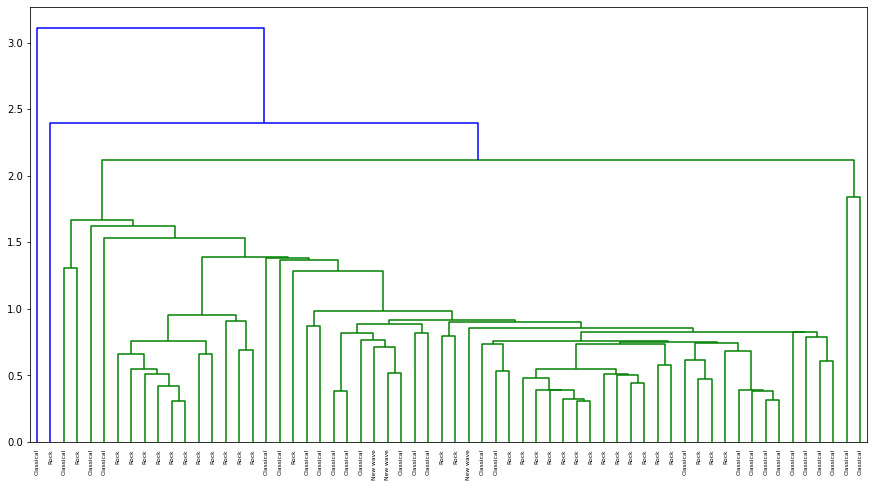

In [ ]:
music_data = pd.read_csv('music2.csv')

# Standardize data
music_data[['LVar', 'LAve', 'LMax', 'LFEner', 'LFreq']] = StandardScaler().fit_transform(music_data[['LVar', 'LAve', 'LMax', 'LFEner', 'LFreq']])

# Single linkage hierarchical clustering by type
music_data_type = music_data.set_index('Type')
music_single_link_type = linkage(music_data_type[['LVar', 'LAve', 'LMax', 'LFEner', 'LFreq']], 'single')
# Dendrogram of above
fig = plt.figure(figsize=(15,8))
dn = dendrogram(music_single_link_type, labels=music_data_type.index)

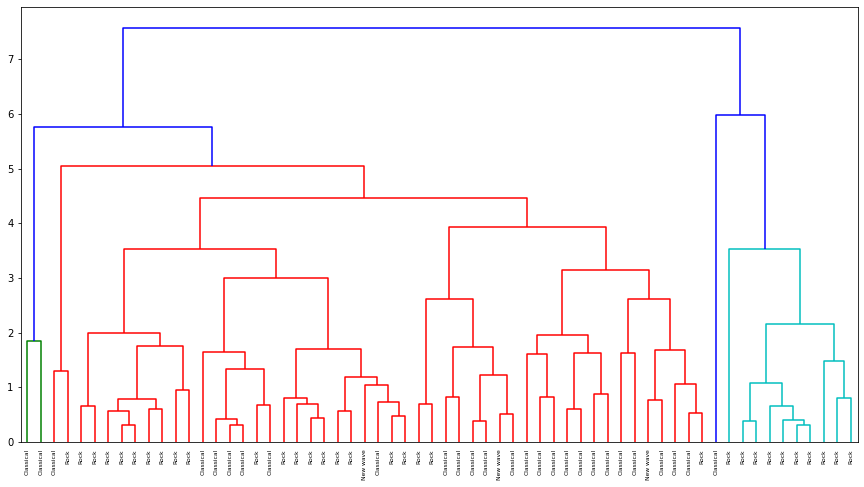

In [ ]:
# Complete linkage hierarchical clustering by type
music_complete_link_type = linkage(music_data_type[['LVar', 'LAve', 'LMax', 'LFEner', 'LFreq']], 'complete')
# Dendrogram of above
fig = plt.figure(figsize=(15,8))
dn = dendrogram(music_complete_link_type, labels=music_data_type.index)

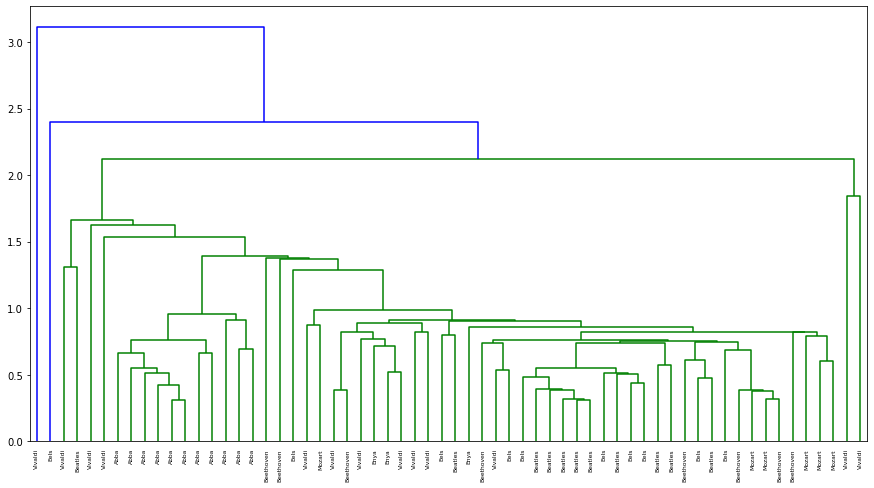

In [ ]:
# Single linkage hierarchical clustering by artist
music_data_artist = music_data.set_index('Artist')
music_single_link_artist = linkage(music_data_artist[['LVar', 'LAve', 'LMax', 'LFEner', 'LFreq']], 'single')
# Dendrogram of above
fig = plt.figure(figsize=(15,8))
dn = dendrogram(music_single_link_artist, labels=music_data_artist.index)

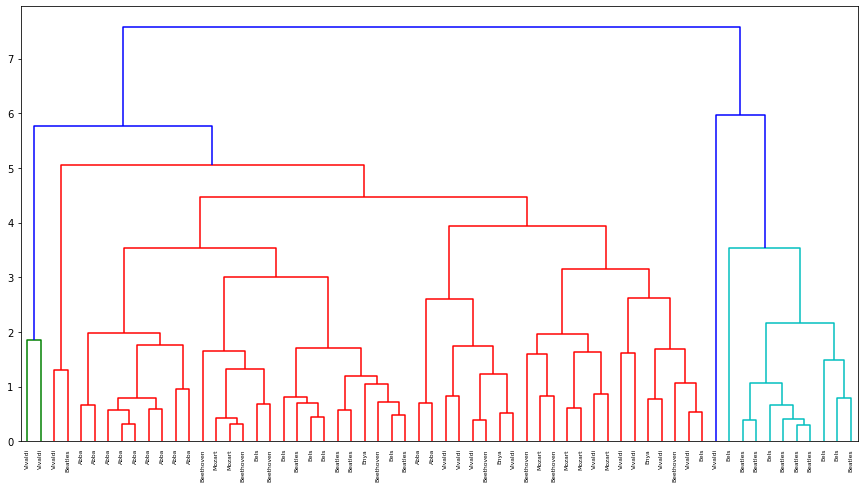

In [ ]:
# Complete linkage hierarchical clustering by artist
music_complete_link_artist = linkage(music_data_artist[['LVar', 'LAve', 'LMax', 'LFEner', 'LFreq']], 'complete')
# Dendrogram of above
fig = plt.figure(figsize=(15,8))
dn = dendrogram(music_complete_link_artist, labels=music_data_artist.index)

The complete linkage method seems to form more logical clusters than the single linkage method. This difference is most pronounced in the Type-labeled dendrograms. The single-linkage method seemed to cluster together Rock and Classical much more readily. By contrast, the complete-linkage method seemed to group more logically by type, starting off with related genres more closely connected.